In [54]:
import pandas as pd
import numpy as np
import os
import pickle

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
import scripts.functions as fn 
from scripts.indicators import supertrend

C:\Users\lbisa\Mi unidad (leonardo.bisaro@gmail.com)\Cripto\python\trd_app


In [55]:
klines_file = './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file  = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Lateral_BTCUSDT_0m01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/0m05/Lateral_BTCUSDT_0m05_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/1h01/Lateral_BTCUSDT_1h01_2023-06-20_2023-10-09.DataFrame'
#klines_file  = './backtest/klines/1h04/Completo_BTCUSDT_1h04_2021-01-01_2023-07-31.DataFrame'

#klines_file = './backtest/klines/1h04/Bajista_BTCUSDT_1h04_2021-04-12_2021-07-12.DataFrame'
with open(klines_file, 'rb') as file:
    df = pickle.load(file)
    #data.set_index('datetime',inplace=True)


#Volume Level

In [56]:
periods = 100
df['pnl'] = None
df['hl_perc'] = (df['high']-df['low'])/((df['high']+df['low']/2))*100
df['oc_perc'] = (abs(df['open']-df['close']))/((df['open']+df['close']/2))*100
df['volat'] = (df['hl_perc']+df['oc_perc'])/2

df['vlt_mean'] = df['volat'].rolling(window=periods).mean()
df['vlt_std'] = df['volat'].rolling(window=periods).std()
df['vlt_high'] = df['vlt_mean']+(df['vlt_std'])
df['vlt_low'] = df['vlt_mean']#-(df['vlt_std'])

df['buy'] = np.where((df['volat']>df['vlt_high'])&(df['open']>df['close']),df['close'],None)
df['sell'] = np.where((df['volat']>df['vlt_high'])&(df['close']>df['open']),df['close'],None)

df = df[periods:-1]

In [58]:
events = [
         {
          'df': df,
          'col':'buy', 'name': 'Buy',
          'color': 'green', 'symbol': 'triangle-up',
         },
         {
          'df': df,
          'col':'sell', 'name': 'Sell',
          'color': 'red', 'symbol': 'triangle-down',
         },
     ]



fig = fn.ohlc_chart(df,events=events)

fig.add_trace(
            go.Scatter(
                x=df["datetime"], y=df['volat'], name="Volatilidad", mode="lines", showlegend=False, 
                line={'width': 1},  
                marker=dict(color="green"),
            ),
            row=3,
            col=1,
        )
fig.add_trace(
            go.Scatter(
                x=df["datetime"], y=df['vlt_mean'], name="Vlt Mean", mode="lines", showlegend=False, 
                line={'width': 1},  
                marker=dict(color="orange"),
            ),
            row=3,
            col=1,
        )
fig.add_trace(
            go.Scatter(
                x=df["datetime"], y=df['vlt_high'], name="Vlt High", mode="lines", showlegend=False, 
                line={'width': 1},  
                marker=dict(color="green"),
            ),
            row=3,
            col=1,
        )
fig.add_trace(
            go.Scatter(
                x=df["datetime"], y=df['vlt_low'], name="Vlt Low", mode="lines", showlegend=False, 
                line={'width': 1},  
                marker=dict(color="red"),
            ),
            row=3,
            col=1,
        )

fig.show()

,op,pnl
107,10.41722,10.41722
108,72.92054,83.33776
110,-10.73632,72.60144
111,-10.73632,61.86512
137,-12.78096,49.08416
...,...,...
1111,-29.99389,13133.50082
1132,-31.45423,13102.04659
1133,-31.45423,13070.59236
1134,212.18407,13282.77643


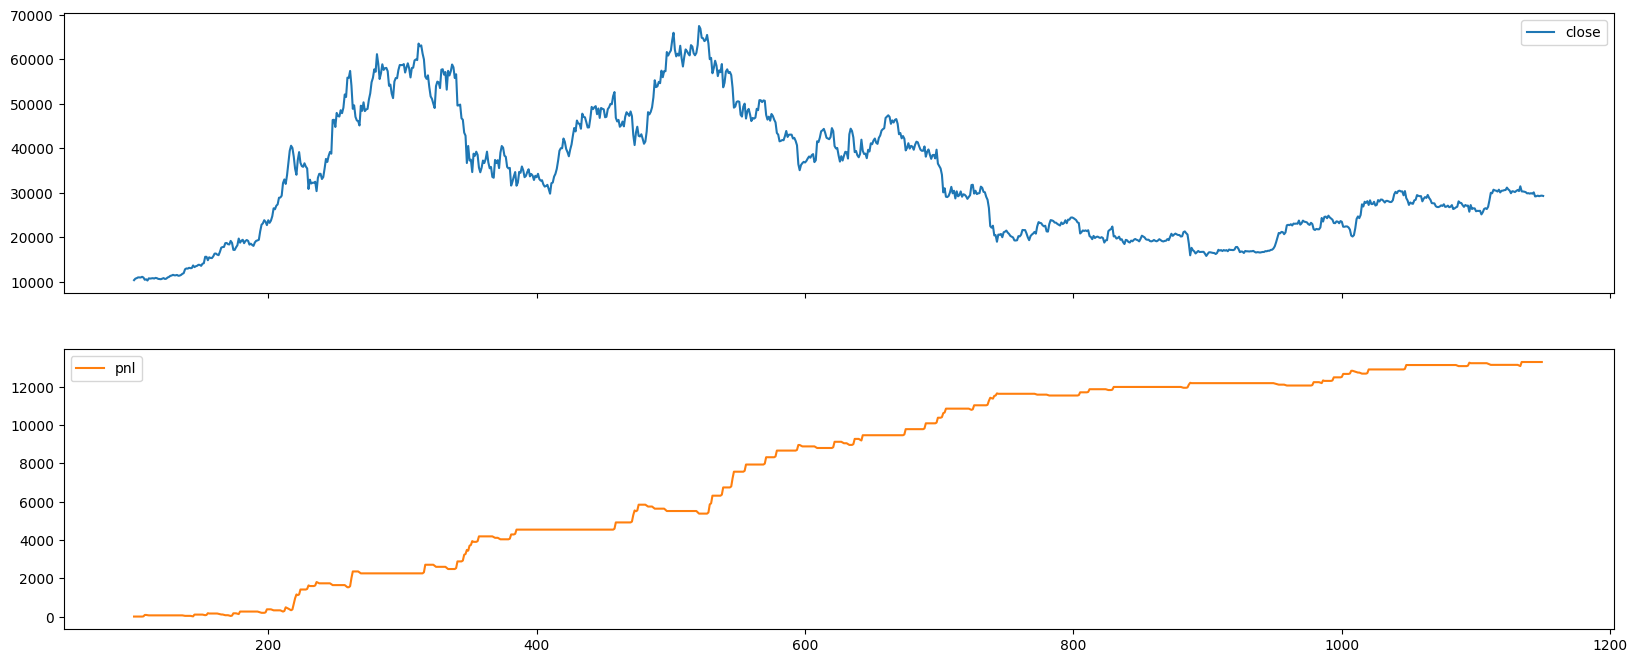

In [69]:
df['op'] = np.where(df['buy']>0,df['close']/1000,0.0)+df['op']
df['op'] = np.where(df['sell']>0,-df['close']/1000,df['op'])

df['pnl'] = df['op'].cumsum()
df[['close','pnl']].plot(figsize=(20,8),subplots=True)
df[['op','pnl']][df['op']!=0.0]
